<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/Statistics-and-Machine-Learning/blob/main/C2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Missing Data

This notebook demonstrates handling missing data in a DataFrame.

### Key Steps:
1. **Create Sample Data**: Simulating missing data in a DataFrame.
2. **Visualize Missing Data**: Heatmap shows missing values before imputation.
3. **Impute Missing Data**: Fill missing values using column means.
4. **Post-Imputation Visualization**: Heatmap shows data after filling.

Libraries used: `pandas`, `numpy`, `matplotlib`, `seaborn`.


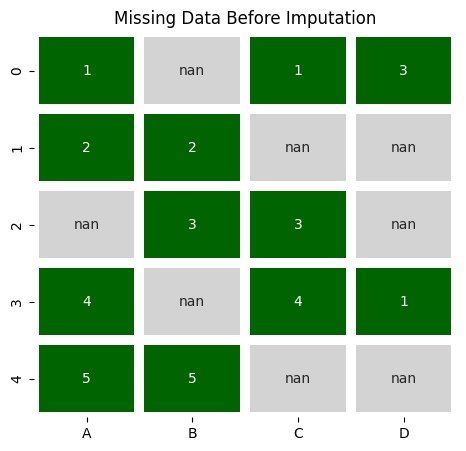

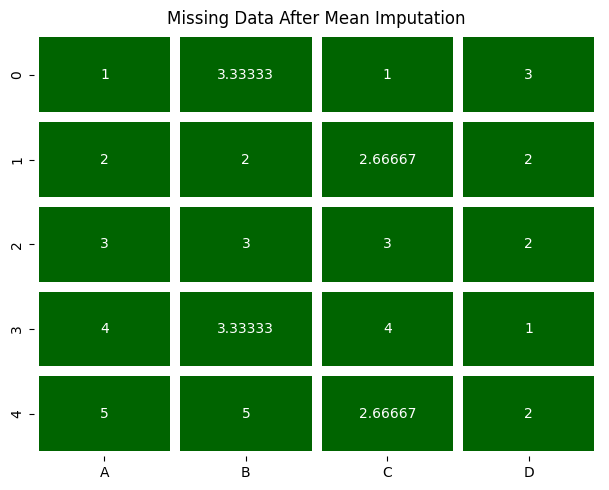

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame with missing data
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5],
    'C': [1, np.nan, 3, 4, np.nan],
    'D': [3, np.nan, np.nan, 1, np.nan]
}
df = pd.DataFrame(data)

# Create a custom colormap
colors = ['#006400', '#D3D3D3']  # Blue for missing, Gray for non-missing
cmap = sns.color_palette(colors, as_cmap=True)

# Plot missing data before imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cmap=cmap, cbar=False, linewidths=6, linecolor='white', annot=df.values, fmt='g')
plt.title('Missing Data Before Imputation')

plt.figure(figsize=(12, 5))

# Fill missing values with the mean
df_imputed = df.fillna(df.mean())

# Plot data after imputation
plt.subplot(1, 2, 1)
sns.heatmap(df_imputed.isnull(), cmap=cmap, cbar=False, linewidths=6, linecolor='white', annot=df_imputed.values, fmt='g')
plt.title('Missing Data After Mean Imputation')

plt.tight_layout()
plt.show()


# Noise and Outliers in Data

In this notebook, we explore the concepts of **noise** and **outliers** in data using a sine wave as an example.

### Noise
- **Definition**: Noise refers to random variations or fluctuations in the data that deviate from the true signal. Noise is inherent in real-world data and often makes patterns harder to discern.
- **Example**: We added random noise to a clean sine wave, simulating real-world imperfections. This is visualized in the "Sine Wave with Added Noise" plot.

### Outliers
- **Definition**: Outliers are data points that differ significantly from other observations. They can result from errors, variability in measurements, or rare events.
- **Example**: Two outliers were introduced into the noisy sine wave, one positive and one negative, and are shown in red in the "Sine Wave with Noise and Outliers" plot.

By visualizing both noise and outliers, we can see how they affect data and why it's important to handle them carefully in machine learning tasks.


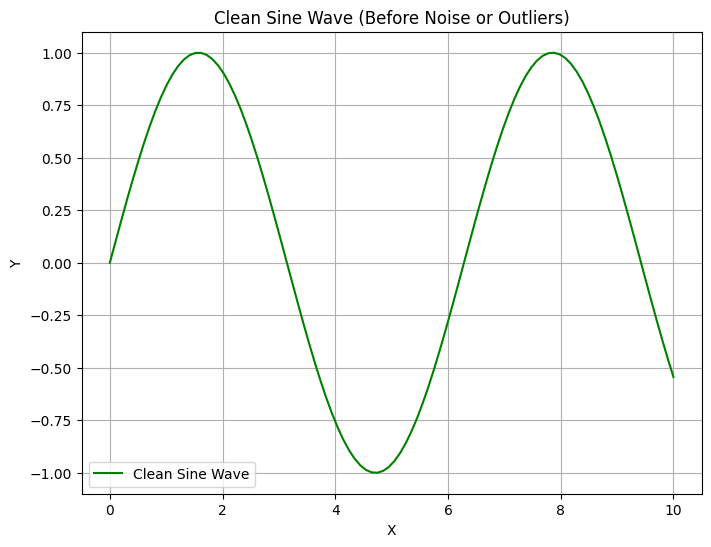

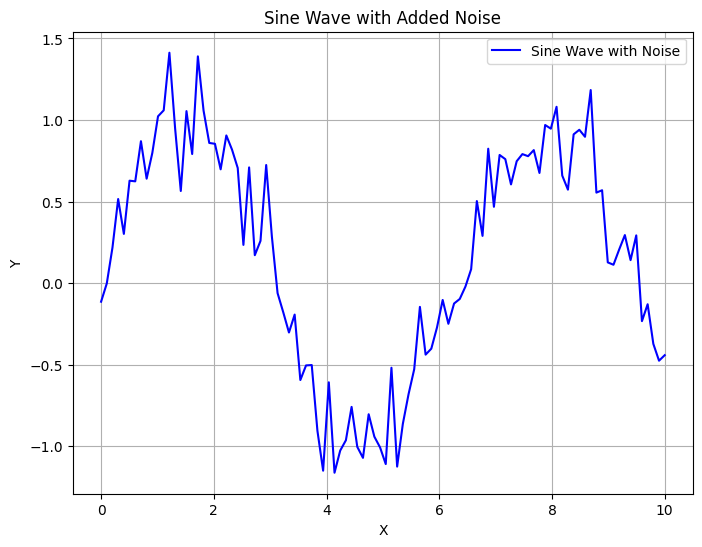

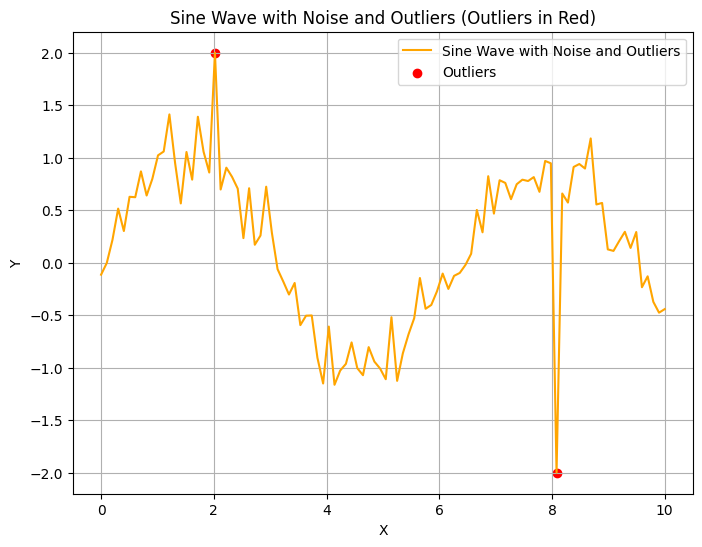

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 10
x = np.linspace(0, 10, 100)

# Generate clean sine wave values
y_clean = np.sin(x)

# Generate noisy sine wave (noise added)
y_noisy = y_clean + np.random.normal(0, 0.2, 100)

# Add outliers to the noisy data
y_noisy_with_outliers = y_noisy.copy()
y_noisy_with_outliers[20] = 2.0  # Positive outlier
y_noisy_with_outliers[80] = -2.0  # Negative outlier

# Plot clean sine wave
plt.figure(figsize=(8, 6))
plt.plot(x, y_clean, label='Clean Sine Wave', color='green')
plt.title('Clean Sine Wave (Before Noise or Outliers)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Plot sine wave with noise
plt.figure(figsize=(8, 6))
plt.plot(x, y_noisy, label='Sine Wave with Noise', color='blue')
plt.title('Sine Wave with Added Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Plot sine wave with noise and outliers
plt.figure(figsize=(8, 6))
plt.plot(x, y_noisy_with_outliers, label='Sine Wave with Noise and Outliers', color='orange')
plt.scatter([x[20], x[80]], [y_noisy_with_outliers[20], y_noisy_with_outliers[80]], color='red', marker='o', label='Outliers')
plt.title('Sine Wave with Noise and Outliers (Outliers in Red)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


# Clustering to Handle Outliers

Clustering can be an effective method for detecting and handling outliers in datasets. By grouping similar data points together into clusters, we can identify those points that do not belong to any cluster or are significantly distant from the cluster centers, potentially marking them as outliers.

### Process:
- **K-Means Clustering**: We applied K-Means clustering to a dataset with three clusters and some manually added outliers.
- **Detecting Outliers**: After clustering, distances between each data point and its corresponding cluster center were calculated. Data points with distances exceeding a certain threshold (95th percentile) were flagged as potential outliers.
- **Visualization**:
    - The  plot highlights potential outliers in black, indicating points that lie far from their respective clusters.

This approach demonstrates how clustering techniques can be used to identify and manage outliers in various datasets.


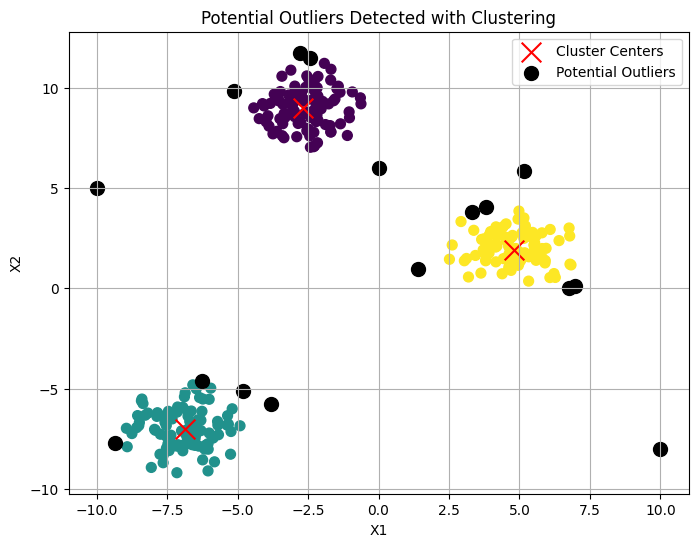

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings

# Suppress any warnings
warnings.filterwarnings("ignore")

# Generate synthetic data with three clusters and outliers
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
outliers = np.array([[10, -8], [0, 6], [-10, 5]])  # Add some outliers
X = np.vstack((X, outliers))

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict cluster labels for each data point
labels = kmeans.predict(X)

# Get cluster centers
centers = kmeans.cluster_centers_


# Detect potential outliers (data points far from cluster centers)
distances = np.linalg.norm(X - centers[labels], axis=1)
outlier_threshold = np.percentile(distances, 95)  # Adjust the percentile as needed
potential_outliers = X[distances > outlier_threshold]

# Plot potential outliers in a separate plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.scatter(potential_outliers[:, 0], potential_outliers[:, 1], c='black', marker='o', s=100, label='Potential Outliers')
plt.title('Potential Outliers Detected with Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


# Anomaly Detection in IoT Sensor Data using Clustering

In this example, we simulate IoT sensor readings from multiple devices and use K-Means clustering to detect potential anomalies (outliers) that might indicate sensor malfunction or unusual activity.

### Key Steps:
1. **Simulated IoT Sensor Data**: We generated synthetic sensor data with normal readings and a few anomalous readings to simulate unusual behavior.
2. **K-Means Clustering**: K-Means was used to group the sensor data into clusters representing normal behavior. Sensor readings significantly different from the cluster centers were flagged as anomalies.
3. **Anomaly Detection**: We calculated the distance of each sensor reading from its assigned cluster center and classified readings beyond the 95th percentile as potential anomalies.

### Visualization:
- **Anomalies**: The  plot identifies potential anomalies, which are marked in black and represent sensor readings that deviate significantly from normal behavior.

This approach is commonly used in real-world applications for anomaly detection in IoT systems, where detecting unusual patterns early can prevent system failures or detect malfunctions.


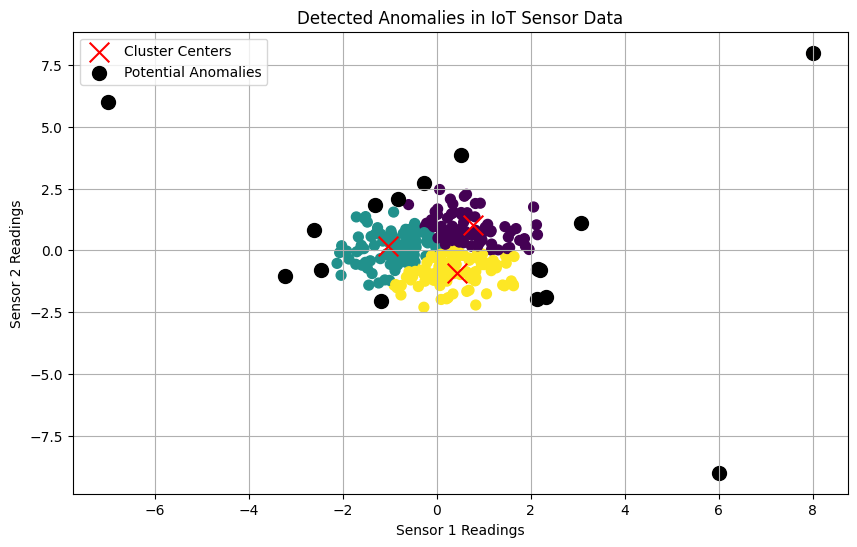

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Simulate IoT sensor data
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(300, 2))  # Normal sensor data (300 samples, 2 sensors)
anomalies = np.array([[8, 8], [-7, 6], [6, -9]])  # Anomalous sensor readings (outliers)

# Combine normal data with anomalies
sensor_data = np.vstack([normal_data, anomalies])

# Convert to DataFrame for real-world context
df_sensor = pd.DataFrame(sensor_data, columns=["Sensor 1", "Sensor 2"])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_sensor)

# Predict cluster labels
labels = kmeans.predict(df_sensor)

# Cluster centers
centers = kmeans.cluster_centers_

# Calculate distances from cluster centers to identify potential anomalies
distances = np.linalg.norm(df_sensor - centers[labels], axis=1)
outlier_threshold = np.percentile(distances, 95)  # Set threshold for outliers (95th percentile)
potential_outliers = df_sensor[distances > outlier_threshold]


# Plot anomalies (potential outliers)
plt.figure(figsize=(10, 6))
plt.scatter(df_sensor["Sensor 1"], df_sensor["Sensor 2"], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.scatter(potential_outliers["Sensor 1"], potential_outliers["Sensor 2"], c='black', marker='o', s=100, label='Potential Anomalies')
plt.title('Detected Anomalies in IoT Sensor Data')
plt.xlabel('Sensor 1 Readings')
plt.ylabel('Sensor 2 Readings')
plt.legend()
plt.grid(True)
plt.show()


# Box Plot for Outlier Detection

Box plots are an effective way to visually detect outliers in a dataset. Outliers appear as points outside the "whiskers" of the box, which represent the range of the majority of the data.

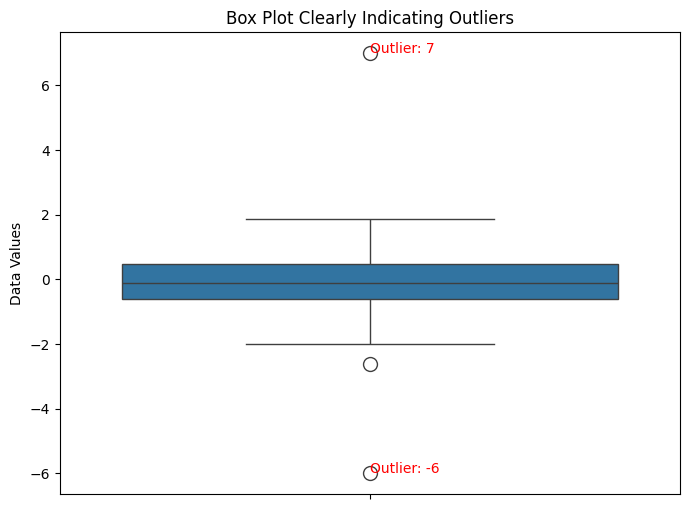

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data with some outliers
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=100)
data_with_outliers = np.append(data, [7, -6])  # Adding outliers

# Create a box plot with clear markers for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_with_outliers, flierprops=dict(marker='o', color='red', markersize=10))
plt.title('Box Plot Clearly Indicating Outliers')
plt.ylabel('Data Values')

# Annotating the outliers for clarity
for outlier in [7, -6]:
    plt.text(0, outlier, f'Outlier: {outlier}', horizontalalignment='left', size='medium', color='red')

plt.show()


# Feature Engineering in Python

This code demonstrates four essential **Feature Engineering** techniques:

1. **Mathematical Transformation**:
   - Created the `Credit to Income Ratio` by dividing the `Credit Score` by `Annual Income`.

2. **Interaction Features**:
   - Generated the `Income * Age` feature by multiplying `Annual Income` and `Age` to capture their combined effect.

3. **Binning**:
   - Grouped the `Age` feature into categorical bins (`Age Group`) such as 18-30, 31-40, etc.

4. **Date/Time Feature**:
   - Calculated the `Days Since Purchase` by subtracting the `Date of Purchase` from the current date, extracting useful information from the date field.

These techniques help transform raw data into more meaningful features for machine learning models.


In [13]:
import pandas as pd
import numpy as np

# Sample Data
data = {
    'Credit Score': [720, 650, 780, 600, 700, 680],
    'Annual Income': [60000, 45000, 75000, 30000, 80000, 55000],
    'Age': [25, 35, 45, 23, 50, 30],
    'Date of Purchase': pd.to_datetime(['2022-01-10', '2021-12-01', '2020-05-15', '2023-04-03', '2022-07-07', '2021-09-20'])
}

df = pd.DataFrame(data)

# 1. Mathematical Transformation: Credit to Income Ratio
df['Credit to Income Ratio'] = df['Credit Score'] / df['Annual Income']

# 2. Interaction Feature: Income multiplied by Age
df['Income * Age'] = df['Annual Income'] * df['Age']

# 3. Binning: Group Age into categories
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 4. Date/Time Feature: Days since last purchase
current_date = pd.to_datetime('2024-09-01')
df['Days Since Purchase'] = (current_date - df['Date of Purchase']).dt.days

# Display the DataFrame
print(df)



   Credit Score  Annual Income  Age Date of Purchase  Credit to Income Ratio  \
0           720          60000   25       2022-01-10                0.012000   
1           650          45000   35       2021-12-01                0.014444   
2           780          75000   45       2020-05-15                0.010400   
3           600          30000   23       2023-04-03                0.020000   
4           700          80000   50       2022-07-07                0.008750   
5           680          55000   30       2021-09-20                0.012364   

   Income * Age Age Group  Days Since Purchase  
0       1500000     18-30                  965  
1       1575000     31-40                 1005  
2       3375000     41-50                 1570  
3        690000     18-30                  517  
4       4000000     51-60                  787  
5       1650000     31-40                 1077  


# Feature Scaling: Standardization and Normalization

This code demonstrates two common feature scaling methods: **Standardization** and **Normalization**.

### Methods:

1. **Standardization**:
   - Scales data to have a mean of 0 and a standard deviation of 1.
   - Useful when features follow a normal distribution.

2. **Normalization**:
   - Scales data to a fixed range, typically [0, 1].
   - Helpful when features have varying scales.

### Visualizations:
- **Box plots** are shown to compare the distribution of the original data, standardized data, and normalized data, illustrating how the scales change while preserving the underlying structure of the data.


Standardized Data:
   Credit Score  Annual Income       Age
0      0.564467       0.146911 -0.972082
1     -0.683302      -0.734553  0.033520
2      1.633984       1.028374  1.039122
3     -1.574566      -1.616017 -1.173203
4      0.207962       1.322196  1.541924
5     -0.148544      -0.146911 -0.469281

Normalized Data:
   Credit Score  Annual Income       Age
0      0.666667            0.6  0.074074
1      0.277778            0.3  0.444444
2      1.000000            0.9  0.814815
3      0.000000            0.0  0.000000
4      0.555556            1.0  1.000000
5      0.444444            0.5  0.259259


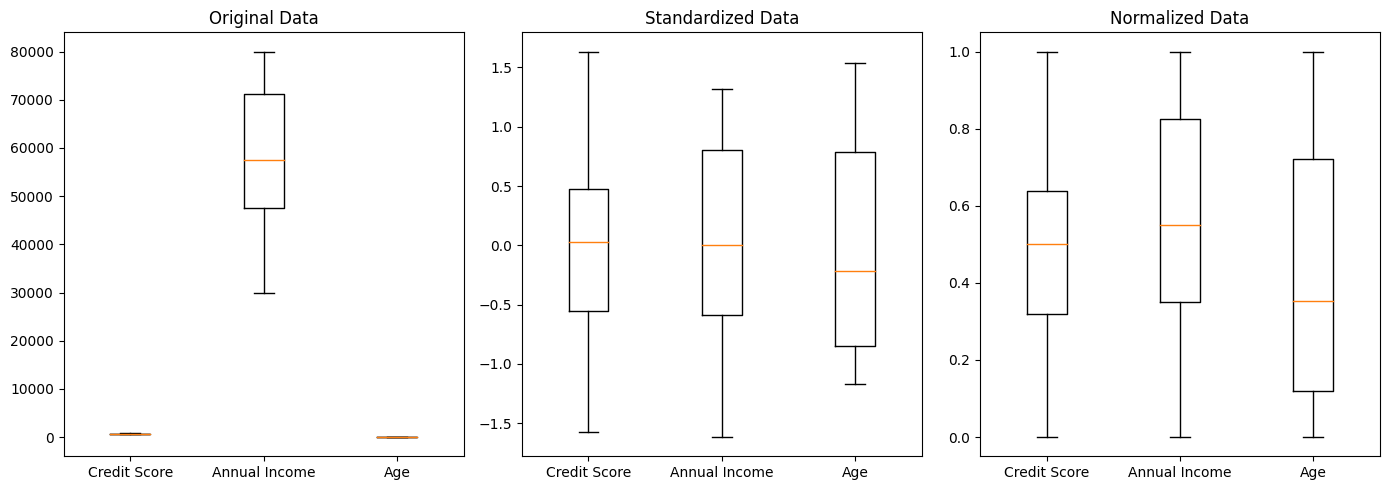

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Sample Data
data = {
    'Credit Score': [720, 650, 780, 600, 700, 680],
    'Annual Income': [60000, 45000, 75000, 30000, 80000, 55000],
    'Age': [25, 35, 45, 23, 50, 30]
}
df = pd.DataFrame(data)

# 1. Standardization (Z-score scaling)
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

# 2. Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

# Display both standardized and normalized data
print("Standardized Data:")
print(df_standardized)

print("\nNormalized Data:")
print(df_normalized)

# Plot original vs standardized vs normalized data for comparison
plt.figure(figsize=(14, 5))

# Plot original data
plt.subplot(1, 3, 1)
plt.title("Original Data")
plt.boxplot([df['Credit Score'], df['Annual Income'], df['Age']], labels=df.columns)

# Plot standardized data
plt.subplot(1, 3, 2)
plt.title("Standardized Data")
plt.boxplot([df_standardized['Credit Score'], df_standardized['Annual Income'], df_standardized['Age']], labels=df_standardized.columns)

# Plot normalized data
plt.subplot(1, 3, 3)
plt.title("Normalized Data")
plt.boxplot([df_normalized['Credit Score'], df_normalized['Annual Income'], df_normalized['Age']], labels=df_normalized.columns)

plt.tight_layout()
plt.show()


# Filter Methods: Correlation-Based Feature Selection

### Method: Pearson Correlation Coefficient
- **Pearson Correlation** measures the linear relationship between two variables, ranging from -1 to 1:
  - **1**: Perfect positive correlation.
  - **0**: No correlation.
  - **-1**: Perfect negative correlation.
  
### Process:
1. We calculate the correlation between each feature and the target variable (`Loan Approval`).
2. Features with high correlation values are selected for further use in the model.

### Key Insight:
- In our dataset, **Credit Score** and **Annual Income** show strong positive correlations with **Loan Approval** (correlation > 0.5). These features are important for predicting loan approval, while **Age** has a weaker correlation and can be deprioritized.


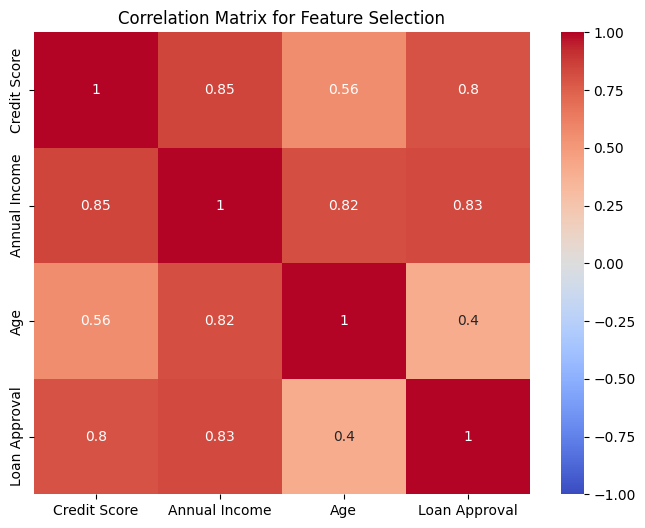

Selected Features Based on Correlation:
['Loan Approval', 'Annual Income', 'Credit Score']


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset with a target variable
data = {
    'Credit Score': [720, 650, 780, 600, 700, 680],
    'Annual Income': [60000, 45000, 75000, 30000, 80000, 55000],
    'Age': [25, 35, 45, 23, 50, 30],
    'Loan Approval': [1, 0, 1, 0, 1, 1]  # Target variable
}

df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr(method='pearson')  # Pearson Correlation

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Feature Selection')
plt.show()

# Filter based on correlation threshold (example: correlation > 0.5)
selected_features = corr_matrix['Loan Approval'].abs().sort_values(ascending=False)
print("Selected Features Based on Correlation:")
print(selected_features[selected_features > 0.5].index.tolist())



# Wrapper Methods for Feature Selection

**Definition**: Wrapper methods select features by testing different combinations and evaluating model performance. They aim to find the optimal subset of features.

## Key Approaches:

1. **Recursive Feature Elimination (RFE)**:
   - Iteratively removes the least important features based on model performance.
   - Used with models like Logistic Regression, Decision Trees.

2. **Forward Feature Selection**:
   - Starts with no features and adds one feature at a time, selecting the one that improves performance the most.

3. **Backward Feature Elimination**:
   - Starts with all features and removes the least important feature in each step, stopping when performance worsens.

4. **Exhaustive Feature Selection**:
   - Tests all possible combinations of features and selects the subset with the best model performance.
   - Computationally expensive but thorough.

## Steps:
1. Train a model with all, no, or random features.
2. Add, remove, or select features based on performance.
3. Repeat until the best subset is found.

**Goal**: Simplify the model, improve accuracy, and avoid overfitting by selecting only the most relevant features.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Independent variables and target
X = df[['Credit Score', 'Annual Income', 'Age']]
y = df['Loan Approval']

# Logistic Regression model
model = LogisticRegression()

# Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=2)
rfe = rfe.fit(X, y)

# Display RFE results
print("Selected Features: ", X.columns[rfe.support_])
print("Feature Ranking: ", rfe.ranking_)


Selected Features:  Index(['Credit Score', 'Age'], dtype='object')
Feature Ranking:  [1 2 1]


# Embedded Methods for Feature Selection

**Definition**: Embedded methods perform feature selection during model training, integrating the process into the model construction itself.

## Key Approaches:

1. **Lasso Regression (L1 Regularization)**:
   - Adds a penalty to the model’s cost function, reducing the coefficients of less important features to zero.
   - Used with linear models, automatically selecting the most relevant features.

2. **Decision Trees**:
   - Automatically ranks features based on their contribution to reducing uncertainty (e.g., Information Gain or Gini Index).
   - Used in decision trees and ensemble methods like Random Forests.

3. **Elastic Net**:
   - Combines L1 (Lasso) and L2 (Ridge) regularization, balancing feature selection and coefficient shrinkage.
   - Used for linear models, selecting features while shrinking less important ones.

## Steps:
1. Train the model using methods like Lasso or Decision Trees.
2. Feature importance is learned during training.
3. Automatically removes or penalizes irrelevant features.

## Example:
In a dataset predicting **Loan Approval**, Lasso Regression penalizes less important features like **Annual Income**, reducing their coefficients to zero, while retaining important ones like **Credit Score**.

**Advantages**:
- **Automatic**: Feature selection happens during model training.
- **Efficient**: Simultaneously selects features and builds the model.
- **Integrated**: Reduces computational overhead by incorporating feature selection into the model.


         Feature  Coefficient
0   Credit Score     0.101607
1  Annual Income     0.205285
2            Age    -0.000000


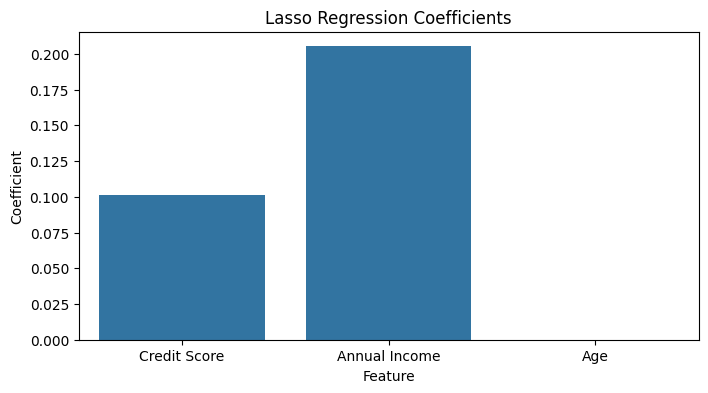

In [18]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

# Display the feature coefficients
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
print(lasso_coefficients)

# Visualize the coefficients
plt.figure(figsize=(8, 4))
sns.barplot(x='Feature', y='Coefficient', data=lasso_coefficients)
plt.title('Lasso Regression Coefficients')
plt.show()
